###Instalação do Pandera

In [1]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 10.4 MB/s 


###Instalação do Numpy

In [2]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Importação da Conexão, do Pandas, Pandera e Numpy

In [3]:
import requests
import pandas as pd
import pandera as pa
import numpy as np

import xml.etree.ElementTree as xconv

###Dataset

In [4]:
# Coleta de dados de despesas

Conexao_01 = requests.get('http://www.al.sp.gov.br/repositorioDados/deputados/despesas_gabinetes.xml')

In [5]:
# Coleta de dados dos deputados

Conexao_02 = requests.get('https://www.al.sp.gov.br/repositorioDados/deputados/deputados.xml')

In [6]:
# Verificar se a API funcionou

print( Conexao_01, Conexao_02 )

<Response [200]> <Response [200]>


In [7]:
# Leitura dos dados de despesas em xml

dfc1 = pd.read_xml(Conexao_01.content)

In [8]:
# Configurando a quantidade de linhas máximas mostradas em tela

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',7500)

In [9]:
# Tipos das Colunas

dfc1.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [10]:
# Conversão para o tipo string

dfc1['Mes'] = dfc1['Mes'].astype(str)
dfc1['Ano'] = dfc1['Ano'].astype(str)
dfc1['Matricula'] = dfc1['Matricula'].astype(str)
dfc1['Valor'] = dfc1['Valor'].astype(str)
dfc1['CNPJ'] = dfc1['CNPJ'].astype(str)

In [11]:
# Visão Geral da tabela dfc1

dfc1

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.0,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.4,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.0,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.0,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
533366,2007,300441,3,120.0,06306675000140,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
533367,2007,300441,3,2096.8,52204617000122,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
533368,2007,300441,3,13.48,62925474000282,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
533369,2007,300441,3,38.08,66747577000170,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


In [12]:
# Leitura dos dados dos deputados em xml

dfc2 = pd.read_xml(Conexao_02.content)


In [13]:
# Tipos das Colunas

dfc2.dtypes

IdDeputado          int64
IdSPL               int64
IdUA                int64
Situacao           object
Andar              object
Aniversario        object
Biografia          object
Email              object
Matricula           int64
NomeParlamentar    object
PathFoto           object
Sala               object
Partido            object
Telefone           object
Fax                object
PlacaVeiculo       object
dtype: object

In [14]:
# Conversão para tipo string

dfc2['IdDeputado'] = dfc2['IdDeputado'].astype(str)
dfc2['IdSPL'] = dfc2['IdSPL'].astype(str)
dfc2['IdUA'] = dfc2['IdUA'].astype(str)
dfc2['Matricula'] = dfc2['Matricula'].astype(str)

In [15]:
# Visão geral de parte do dataframe dfc2

dfc2

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,PlacaVeiculo
0,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,300605,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
1,548,1000000332,20370,EXE,Térreo,09/07,"<p class=""MsoNormal"">Com uma hist&oacute;ria d...",adrianaborgo@al.sp.gov.br,300606,Adriana Borgo,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 45,AGIR,(11) 3886-6567/8770,None,None
2,547,1000000335,20455,EXE,2º andar,26/08,<p>Danilo Mascarenhas de Balas nasceu na cidad...,apfdanilobalas@al.sp.gov.br,300607,Agente Federal Danilo Balas,http://www3.al.sp.gov.br/repositorio/deputadoP...,255,PL,(11)3886-6052/6054,None,None
3,128,39,20369,EXE,3º,04/01,"<p style=""outline: none; color: #121212; margi...",ademarchi@al.sp.gov.br,300288,Aldo Demarchi,http://www3.al.sp.gov.br/repositorio/deputadoP...,356,UNIÃO,3886-6453/6454,None,None
4,546,1000000342,20399,EXE,1º,17/09,"<p>Alexander Muniz de Oliveira, nascido na cid...",alexdemadureira@al.sp.gov.br,300608,Alex de Madureira,http://www3.al.sp.gov.br/repositorio/deputadoP...,173,PL,(11)3886-6676 / 6677,None,None
5,261,13076,20413,EXE,4º,02/07,"<p class=""MsoNormal"">Alexandre Pereira nasceu ...",alexandrepereira@al.sp.gov.br,300553,Alexandre Pereira,http://www3.al.sp.gov.br/repositorio/deputadoP...,405,SD,(11)3886-6426 / 6428,None,None
6,545,1000000351,20420,EXE,Térreo,25/09,"<p><span style=""font-family: arial, helvetica,...",altairmoraes@al.sp.gov.br,300609,Altair Moraes,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 53,REPUBLICANOS,(11)3886-6468 / 6476,None,None
7,6,434,20378,EXE,2º,09/04,<p>Analice Fernandes &eacute; deputada pelo PS...,afernandes@al.sp.gov.br,300431,Analice Fernandes,http://www3.al.sp.gov.br/repositorio/deputadoP...,261,PSDB,(11)3886-6797/6798,3885-5240,None
8,58,12381,20433,EXE,3º,07/06,"<p>De origem humilde, Andr&eacute; do Prado te...",andredoprado@al.sp.gov.br,300497,André do Prado,http://www3.al.sp.gov.br/repositorio/deputadoP...,350,PL,(11)3886-6562/6563,None,None
9,542,1000000363,20436,EXE,Térreo,19/06,"<p class=""MsoNormal"" style=""margin-bottom: 10....",ataide.teruel@al.sp.gov.br,300612,Ataide Teruel,http://www3.al.sp.gov.br/repositorio/deputadoP...,T-39,PODE,(11)3886-6497/6502,None,None


In [16]:
# Juntando a Conexao_01 com a Conexao_02

concat = pd.merge(dfc1, dfc2)

In [17]:
# Visão Geral de parte da tabela
concat

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,PlacaVeiculo
0,2019,300605,3,7200.0,08390859000166,ADALBERTO FREITAS,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...",BRITHE GRÁFICA LTDA - EPP,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
1,2019,300605,3,30.0,17781480000178,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KREMER & SIMÕES DISTRIBUIDORA DE ÁGUA MINERAL ...,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
2,2019,300605,3,4.0,28720558000160,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,SHOPPING DO REAL - ANJOS DA ECONOMIA UTILIDADE...,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
3,2019,300605,3,2296.85,43283811003841,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KALUNGA COM.E IND. GRÁFICA LTDA.,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
4,2019,300605,3,168.75,43283811006867,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KALUNGA COM. E IND. GRÁFICA LTDA.,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169355,2022,300589,7,210.67,46392130000118,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",PREFEITURA SÃO PAULO SECRETARIA FINANÇAS,290,13098,20405,EXE,2º andar,22/01,"<p>Nascido em 1979, na cidade de Santos (litor...",wmoura@al.sp.gov.br,Wellington Moura,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139,None,None
169356,2022,300589,7,359.38,58200015000183,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",MUNICIPIO DE SANTOS,290,13098,20405,EXE,2º andar,22/01,"<p>Nascido em 1979, na cidade de Santos (litor...",wmoura@al.sp.gov.br,Wellington Moura,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139,None,None
169357,2022,300589,7,714.48,62816798000100,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",HUBERT IMOVEIS E ADMINISTRAÇÃO LTDA,290,13098,20405,EXE,2º andar,22/01,"<p>Nascido em 1979, na cidade de Santos (litor...",wmoura@al.sp.gov.br,Wellington Moura,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139,None,None
169358,2022,300589,7,3197.0,09508981000157,WELLINGTON MOURA,N - MORADIA,MF2 EMPREENDIMENTOS IMOBILIARIOS LTDA,290,13098,20405,EXE,2º andar,22/01,"<p>Nascido em 1979, na cidade de Santos (litor...",wmoura@al.sp.gov.br,Wellington Moura,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139,None,None


In [18]:
# Lista os tipos

concat.dtypes

Ano                object
Matricula          object
Mes                object
Valor              object
CNPJ               object
Deputado           object
Tipo               object
Fornecedor         object
IdDeputado         object
IdSPL              object
IdUA               object
Situacao           object
Andar              object
Aniversario        object
Biografia          object
Email              object
NomeParlamentar    object
PathFoto           object
Sala               object
Partido            object
Telefone           object
Fax                object
PlacaVeiculo       object
dtype: object

In [19]:
# Salvando o dataset tratado em formato xml

concat.to_xml('deputados.xml')

In [20]:
# Convertendo de xml para csv

cols = ["Ano", 
        "Matricula", 
        "Mes", 
        "Valor", 
        "CNPJ", 
        "Deputado",
        "Tipo",
        "Fornecedor",
        "IdDeputado",
        "IdSPL",
        "IdUA",
        "Situacao",
        "Andar",
        "Aniversario",
        "Email",
        "PathFoto",
        "Sala",
        "Partido",
        "Telefone"
        ]
rows=[]

xml = xconv.parse('deputados.xml')
root=xml.getroot()

for i in root:
   Ano = i.find("Ano").text
   Matricula = i.find("Matricula").text 
   Mes = i.find("Mes").text
   Valor = i.find("Valor").text 
   CNPJ = i.find("CNPJ").text
   Deputado = i.find("Deputado").text
   Tipo = i.find("Tipo").text
   Fornecedor = i.find("Fornecedor").text
   IdDeputado = i.find("IdDeputado").text
   IdSPL = i.find("IdSPL").text
   IdUA = i.find("IdUA").text
   Situacao = i.find("Situacao").text
   Andar = i.find("Andar").text
   Aniversario = i.find("Aniversario").text
   Email = i.find("Email").text
   PathFoto = i.find("PathFoto").text
   Sala = i.find("Sala").text
   Partido = i.find("Partido").text
   Telefone = i.find("Telefone").text

   rows.append({
       "Ano": Ano, 
        "Matricula": Matricula, 
        "Mes": Mes, 
        "Valor": Valor, 
        "CNPJ": CNPJ, 
        "Deputado": Deputado,
        "Tipo": Tipo,
        "Fornecedor": Fornecedor,
        "IdDeputado": IdDeputado,
        "IdSPL": IdSPL,
        "IdUA": IdUA,
        "Situacao": Situacao,
        "Andar": Andar,
        "Aniversario": Aniversario,
        "Email": Email,
        "PathFoto": PathFoto,
        "Sala": Sala,
        "Partido": Partido,
        "Telefone": Telefone
       
       
   })

concat = pd.DataFrame(rows, columns=cols)

concat.to_csv('lista_deputados.csv', index=False)
  

In [21]:
# Carregamento do dataset localmente

dados = pd.read_csv('/content/lista_deputados.csv',sep=',')

In [22]:
# Visão geral da tabela

dados

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Email,PathFoto,Sala,Partido,Telefone
0,2019,300605,3,7200.00,08390859000166,ADALBERTO FREITAS,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...",BRITHE GRÁFICA LTDA - EPP,549,1000000330,20377,EXE,3º andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559
1,2019,300605,3,30.00,17781480000178,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KREMER & SIMÕES DISTRIBUIDORA DE ÁGUA MINERAL ...,549,1000000330,20377,EXE,3º andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559
2,2019,300605,3,4.00,28720558000160,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,SHOPPING DO REAL - ANJOS DA ECONOMIA UTILIDADE...,549,1000000330,20377,EXE,3º andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559
3,2019,300605,3,2296.85,43283811003841,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KALUNGA COM.E IND. GRÁFICA LTDA.,549,1000000330,20377,EXE,3º andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559
4,2019,300605,3,168.75,43283811006867,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KALUNGA COM. E IND. GRÁFICA LTDA.,549,1000000330,20377,EXE,3º andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169355,2022,300589,7,210.67,46392130000118,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",PREFEITURA SÃO PAULO SECRETARIA FINANÇAS,290,13098,20405,EXE,2º andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139
169356,2022,300589,7,359.38,58200015000183,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",MUNICIPIO DE SANTOS,290,13098,20405,EXE,2º andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139
169357,2022,300589,7,714.48,62816798000100,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",HUBERT IMOVEIS E ADMINISTRAÇÃO LTDA,290,13098,20405,EXE,2º andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139
169358,2022,300589,7,3197.00,09508981000157,WELLINGTON MOURA,N - MORADIA,MF2 EMPREENDIMENTOS IMOBILIARIOS LTDA,290,13098,20405,EXE,2º andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(011)3886-6096 / 6139


##Procura por Inconsistências

In [23]:
# Coluna ano

pd.unique(dados['Ano'])

array([2019, 2020, 2021, 2022, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [24]:
# Coluna Matricula

pd.unique(dados['Matricula'])

array([300605, 300606, 300607, 300288, 300608, 300553, 300609, 300431,
       300497, 300612, 300188, 300613, 300540, 300217, 300614, 300501,
       300485, 300499, 300615, 300616, 300205, 300617, 300548, 300618,
       300619, 300620, 300621, 300543, 300650, 300622, 300623, 300624,
       300292, 300318, 300449, 300395, 300440, 300625, 300303, 300583,
       300626, 300627, 300450, 300628, 300629, 300510, 300630, 300367,
       300549, 300544, 300513, 300631, 300545, 300264, 300633, 300634,
       300635, 300552, 300471, 300636, 300533, 300653, 300098, 300483,
       300637, 300654, 300534, 300655, 300536, 300638, 300639, 300640,
       300641, 300344, 300470, 300539, 300267, 300382, 300643, 300519,
       300407, 300260, 300644, 300520, 300645, 300646, 300647, 300584,
       300648, 300649, 300430, 300589])

In [25]:
# Coluna Mes

pd.unique(dados['Mes'])

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2])

In [26]:
# Coluna Valor

pd.unique(dados['Valor'])

# Presença de linhas vazias

array([7.20000e+03, 3.00000e+01, 4.00000e+00, ..., 1.17282e+03,
       4.30160e+02, 7.14480e+02])

In [27]:
# Listando todos os dados da coluna Valor

valor =  sorted(pd.unique(dados['Valor']))
for r in range(len(valor)):
  if r % 20 == 0:
        print()
  print(valor[r], end=', ')


0.0, 0.01, 0.02, 0.3, 0.45, 0.51, 0.58, 0.61, 0.75, 1.0, 1.05, 1.15, 1.19, 1.2, 1.25, 1.3, 1.35, 1.4, 1.49, 1.5, 
1.53, 1.55, 1.6, 1.65, 1.7, 1.75, 1.78, 1.8, 1.83, 1.85, 1.9, 1.91, 1.95, 1.99, 2.0, 2.01, 2.05, 2.1, 2.15, 2.2, 
2.25, 2.28, 2.3, 2.32, 2.34, 2.35, 2.4, 2.45, 2.49, 2.5, 2.56, 2.57, 2.58, 2.6, 2.65, 2.67, 2.7, 2.73, 2.75, 2.79, 
2.8, 2.85, 2.9, 2.92, 2.94, 2.95, 2.97, 2.99, 3.0, 3.01, 3.05, 3.08, 3.1, 3.15, 3.19, 3.2, 3.22, 3.24, 3.25, 3.29, 
3.3, 3.31, 3.35, 3.4, 3.49, 3.5, 3.51, 3.55, 3.56, 3.6, 3.65, 3.66, 3.68, 3.7, 3.73, 3.75, 3.8, 3.85, 3.87, 3.9, 
3.94, 3.95, 3.96, 3.98, 3.99, 4.0, 4.01, 4.05, 4.06, 4.1, 4.15, 4.19, 4.2, 4.23, 4.25, 4.27, 4.29, 4.3, 4.35, 4.38, 
4.4, 4.44, 4.45, 4.49, 4.5, 4.52, 4.55, 4.6, 4.63, 4.65, 4.66, 4.68, 4.69, 4.7, 4.71, 4.75, 4.78, 4.8, 4.85, 4.9, 
4.94, 4.95, 4.96, 4.99, 5.0, 5.04, 5.1, 5.14, 5.15, 5.16, 5.18, 5.2, 5.22, 5.23, 5.24, 5.25, 5.29, 5.3, 5.35, 5.37, 
5.4, 5.42, 5.43, 5.45, 5.48, 5.49, 5.5, 5.52, 5.54, 5.55, 5.57, 5.59, 5.6, 5

In [28]:
# Coluna CNPJ

pd.unique(dados['CNPJ'])

array(['08390859000166', '17781480000178', '28720558000160', ...,
       '14394533000100', '37030862000177', '20504094000224'], dtype=object)

In [29]:
# Listando todos os valores de CNPJ

cnpj =  sorted(pd.unique(dados['CNPJ']))
for r in range(len(cnpj)):
  if r % 20 == 0:
        print()
  print(cnpj[r], end=', ')

# Presença de valores vazios, None


00000000000000, 00000936000112, 00001365000130, 00002953000199, 00003188000202, 00003188000555, 00003188000636, 00003188001101, 00003188001950, 00003449000103, 00003455000160, 00003727000122, 00004638000109, 00005102000108, 00005234000121, 00006638000130, 00007016000126, 00008226000139, 00008897000108, 00009893000136, 
00010564000105, 00010952000196, 00011631000106, 00011835000147, 00012093000174, 00012135000177, 00012752000172, 00013262000190, 00013846000166, 00014971000190, 00015094000172, 00015228000155, 00015327000137, 00016966000117, 00016968000106, 00016969000150, 00017090000123, 00017258000109, 00017512000160, 00017842000156, 
00019357000111, 00019564000176, 00021093000130, 00021351000189, 00021475000164, 00021716000175, 00021976000140, 00022499000138, 00022612000185, 00022964000130, 00023198000129, 00024050000109, 00024610000125, 00025047000100, 00025345000108, 00025605000137, 00026935000147, 00027021000109, 00027322000124, 00027372000101, 
00027640000195, 00027652000110, 0002

In [30]:
# Coluna Deputado

pd.unique(dados['Deputado'])

array(['ADALBERTO FREITAS', 'ADRIANA BORGO',
       'AGENTE FEDERAL DANILO BALAS', 'ALDO DEMARCHI',
       'ALEX DE MADUREIRA', 'ALEXANDRE PEREIRA', 'ALTAIR MORAES',
       'ANALICE FERNANDES', 'ANDRÉ DO PRADO', 'ATAIDE TERUEL',
       'BARROS MUNHOZ', 'BRUNO GANEM', 'CAIO FRANÇA', 'CAMPOS MACHADO',
       'CARLA MORANDO', 'CARLOS CEZAR', 'CARLOS GIANNAZI',
       'CARLÃO PIGNATARI', 'CASTELLO BRANCO', 'CEZAR', 'CONTE LOPES',
       'CORONEL NISHIKAWA', 'CORONEL TELHADA', 'DANIEL JOSÉ',
       'DANIEL SOARES', 'DELEGADA GRACIELA', 'DELEGADO BRUNO LIMA',
       'DELEGADO OLIM', 'DIRCEU DALBEN', 'DOUGLAS GARCIA',
       'DR. JORGE DO CARMO', 'DRA. DAMARIS MOURA', 'EDMIR CHEDID',
       'EDNA MACEDO', 'EDSON GIRIBONI', 'EMIDIO DE SOUZA', 'ENIO TATTO',
       'ERICA MALUNGUINHO', 'ESTEVAM GALVÃO', 'FERNANDO CURY',
       "FREDERICO D'AVILA", 'GIL DINIZ', 'GILMACI SANTOS',
       'HENI OZI CUKIER', 'ISA PENNA', 'ITAMAR BORGES',
       'JANAINA PASCHOAL', 'JORGE CARUSO',
       'JORGE WILSON

In [31]:
# Coluna Fornecedor

pd.unique(dados['Fornecedor'])

array(['BRITHE GRÁFICA LTDA - EPP',
       'KREMER & SIMÕES DISTRIBUIDORA DE ÁGUA MINERAL LTDA - EPP',
       'SHOPPING DO REAL - ANJOS DA ECONOMIA UTILIDADES DOMÉSTICAS LTDA',
       ..., 'BOM JESUS AUTO POSTO', 'SHOPPING MORUMBI RSTAURANTE',
       'POSTO FAROL 48 DA CASTELO'], dtype=object)

In [32]:
# Listando todos os valores de Fornecedor

fornecedor =  sorted(pd.unique(dados['Fornecedor']))
for r in range(len(fornecedor)):
  if r % 20 == 0:
        print()
  print(fornecedor[r], end=', ')




"O BRAZEIRO" GALETO NA BRASA LTDA, "O REI DOS ENVELOPES" GRAF. COMERCIAL E DISTRIBUIDORA LTDA., 'FREIRE VEÍCULOS, ,FENIX AUTO POSTO DE SERVIÇOS LTDA, 1 OFICIAL DE REGISTRO DE IMOVEIS DA COMARCA DE ARARAQUARA, 1 OFICIAL DE REGISTRO DE IMOVEIS DE SAO PAULO, 1 TABELIAO DE NOTAS DA CAPITAL, 1 TABELIONATO DE NOTAS, 1 TABELIONATO DE NOTAS E ANEXOS, 101 GRILL, 1088 COND.IBIRAPUERA CENTRAL PARK, 11 º TABELIÃO DE NOTAS, 11º TABELIÃO DE NOTAS, 123 MILHAS, 123 VIAGENS E TURISMO, 123 VIAGENS E TURISMO LTDA, 13 A INFORMATICA E MATERIAL DE ESCRITÓRIO LTDA., 13º TABELIÃO DE NOTAS DE SÃO PAULO, 14 TABELIONATO DE NOTAS, 14º TABELIONATO DE NOTAS, 
16º TABELIÃO DE NOTAS, 1857 COMERCEIO E EXPORTAÇÃO DE CAFÉ LTDA, 1857 COMERCIO E EXPORTAÇAO DE CAFE, 19 CARTORIO DE REGISTRO CIVIL, 1900 PIZZERIA - CÉSAR MOMO LANCHONETE LTDA., 1º OFICIAL DE REGISTRO DE IMÓVEIS DE MOGI DAS CRUZES-SP, 1º TABELIAO DE NOTAS E DE PROTESTOS - BEL. DENILSON DANIEL, 1º TABELIAO DE NOTAS E PROTESTO DE SUZANO, 1º TABELIÃO DE NOTAS E D

In [33]:
# Coluna IdDeputado

pd.unique(dados['IdDeputado'])

array([ 549,  548,  547,  128,  546,  261,  545,    6,   58,  542,  158,
        541,  267,  173,  540,  142,  148,   11,  539,  538,  180,  537,
        286,  536,  535,  534,  533,  263,  561,  532,  531,  530,   70,
        516,  110,  517,  175,  529,  177,  270,  528,  527,   49,  526,
        525,  141,  524,   84,  274,  276,   38,  523,  279,  285,  521,
        520,  519,  283,   78,  518,  284, 1521,   87,  163,  515, 1541,
        281, 1561,  287,  514,  513,  512,  511,  112,  126,  288,   74,
         91,  509,   90,   71,   28,  508,   95,  507,  506,  505,  289,
        504,  503,   13,  290])

In [34]:
# Coluna IdSPL

pd.unique(dados['IdSPL'])

array([1000000330, 1000000332, 1000000335,         39, 1000000342,
            13076, 1000000351,        434,      12381, 1000000363,
              268, 1000000366,      13080,         94, 1000000369,
            12396,      10592,      12392, 1000000376, 1000000378,
               82, 1000000397,      13095, 1000000399, 1000000400,
       1000000401, 1000000406,      13077, 1000000426, 1000000408,
       1000000410, 1000000413,         68,         70,      10597,
              291,        431, 1000000419,         78,      13082,
       1000000420, 1000000334,      10603, 1000000337, 1000000338,
            12380, 1000000339,        197,      13085,      13086,
            12420, 1000000340,      13089,         40, 1000000346,
       1000000347, 1000000348,      13093,      10611, 1000000349,
            13094, 1000000610,       4926,      10613, 1000000350,
                0,      13091, 1000000723,      13096, 1000000352,
       1000000354, 1000000355, 1000000358,        180,      10

In [35]:
# Coluna IdUA

pd.unique(dados['IdUA'])

array([20377, 20370, 20455, 20369, 20399, 20413, 20420, 20378, 20433,
       20436, 20396, 20423, 20406, 20374, 20428, 20458, 20380, 20416,
       20392, 20442, 20457, 20386, 20384, 20445, 20365, 20418, 20409,
       20375, 20411, 20417, 20366, 20402, 20390, 20368, 20387, 20425,
       20440, 20395, 20410, 20371, 20419, 20389, 20372, 20382, 20438,
       20421, 20426, 20408, 20456, 20412, 20429, 20431, 20388, 20381,
       20448, 20397, 20407, 20376, 20430, 20403, 20393, 20439, 20379,
       20449, 20451, 20398, 20415, 20373, 20401, 20453, 20434, 20422,
       20450, 20437, 20385, 20444, 20441, 20443, 20432, 20452, 20427,
       20446, 20424, 20454, 20391, 20404, 20435, 20414, 20400, 20447,
       20394, 20405])

In [36]:
# Coluna Situacao

pd.unique(dados['Situacao'])

array(['EXE'], dtype=object)

In [37]:
# Coluna Andar

pd.unique(dados['Andar'])

# Existência de None
# 3º andar,  3º e 3º Andar 
# Térreo e Téreo
# 2º andar, 2º e 2°
# 1º,  1º Andar e 1º andar
# 4º e 4º Andar


array(['3º andar', 'Térreo', '2º andar', '3º', '1º', '4º', '2º',
       '1º Andar', '3º Andar', 'Téreo', nan, '2°', '4º Andar', '1º andar'],
      dtype=object)

In [38]:
# Tratando as inconsistências

dados['Andar'].replace('3º andar', "3º Andar", inplace=True)
dados['Andar'].replace('3º', "3º Andar", inplace=True)
dados['Andar'].replace('Téreo', "Térreo", inplace=True)
dados['Andar'].replace('2º andar', "2º Andar", inplace=True)
dados['Andar'].replace('2º', "2º Andar", inplace=True)
dados['Andar'].replace('2°', "2º Andar", inplace=True)
dados['Andar'].replace('1º', "1º Andar", inplace=True)
dados['Andar'].replace('1º andar', "1º Andar", inplace=True)
dados['Andar'].replace('4º', "4º Andar", inplace=True)


In [39]:
# Coluna Aniversario

pd.unique(dados['Aniversario'])

# Presença de null/null

array(['01/11', '09/07', '26/08', '04/01', '17/09', '02/07', '25/09',
       '09/04', '07/06', '19/06', '26/10', '15/09', '01/08', '31/10',
       '08/10', '13/07', '15/12', '10/11', '14/05', '07/01', '10/10',
       '14/02', '19/01', '08/07', '25/08', '11/09', '13/06', 'null/null',
       '16/06', '21/04', '06/08', '01/04', '06/04', '22/05', '20/05',
       '20/11', '15/08', '26/05', '02/11', '16/03', '29/01', '28/03',
       '21/12', '25/06', '16/01', '07/09', '22/12', '12/09', '16/05',
       '10/09', '29/12', '17/06', '06/10', '07/05', '18/01', '30/10',
       '15/05', '08/12', '03/08', '28/01', '09/02', '02/10', '24/04',
       '25/01', '14/07', '01/05', '28/07', '05/09', '06/01', '05/03',
       '09/08', '29/07', '17/03', '03/09', '29/03', '16/08', '28/10',
       '01/10', '18/06', '08/01', '01/02', '23/04', '16/09', '06/11',
       '22/01'], dtype=object)

In [40]:
# Coluna Email

pd.unique(dados['Email'])

# Presença de None
# Presença de " "

array(['adalbertofreitas@al.sp.gov.br', 'adrianaborgo@al.sp.gov.br',
       'apfdanilobalas@al.sp.gov.br', 'ademarchi@al.sp.gov.br',
       'alexdemadureira@al.sp.gov.br', 'alexandrepereira@al.sp.gov.br',
       'altairmoraes@al.sp.gov.br', 'afernandes@al.sp.gov.br',
       'andredoprado@al.sp.gov.br', 'ataide.teruel@al.sp.gov.br',
       'barrosmunhoz@al.sp.gov.br', 'brunoganem@al.sp.gov.br',
       'caiofranca@al.sp.gov.br', 'cmachado@al.sp.gov.br',
       'carlamorando@al.sp.gov.br', 'carloscezar@al.sp.gov.br',
       'cgiannazi@al.sp.gov.br', 'carlaopignatari@al.sp.gov.br',
       'castellobranco@al.sp.gov.br', 'cezar@al.sp.gov.br',
       'clopes@al.sp.gov.br', 'celnishikawa@al.sp.gov.br',
       'coroneltelhada@al.sp.gov.br', 'danieljose@al.sp.gov.br',
       'DanielSoares@al.sp.gov.br', 'delegadagraciela@al.sp.gov.br',
       'del.brunolima@al.sp.gov.br', 'deputado.delegadoolim@al.sp.gov.br',
       'dirceudalben@al.sp.gov.br', 'depdouglasgarcia@al.sp.gov.br',
       'drdepjorge

In [41]:
# Coluna PathFoto

pd.unique(dados['PathFoto'])

# Inconsistência 'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/Roque Barbiere aberto em Paint editado 170 x 170.jpg'
# Inconsistência 'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/Edson Giriboni editada 170 x 170.JPG'

array(['http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20190315-170816-id=549-PEQ.jpeg',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20190315-170706-id=548-PEQ.jpg',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20191112-185812-id=547-PEQ.jpg',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20150610-161747-id=128-PEQ.png',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20191114-162609-id=546-PEQ.jpg',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20190315-160131-id=261-PEQ.jpg',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20190315-170336-id=545-PEQ.png',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20210418-184803-id=6-PEQ.png',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20190315-154613-id=58-PEQ.jpg',
       'http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/20210311-213749-id=542-PEQ.JPG',
       'http

In [42]:
# Eliminando os links que não funcionam

dados.replace(['http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/Roque Barbiere aberto em Paint editado 170 x 170.jpg'],np.nan,inplace=True)

dados.replace(['http://www3.al.sp.gov.br/repositorio/deputadoPortal/fotos/Edson Giriboni editada 170 x 170.JPG'],np.nan,inplace=True)

In [43]:
# Coluna Sala

pd.unique(dados['Sala'])



array(['305', 'T. 45', '255', '356', '173', '405', 'T. 53', '261', '350',
       'T-39', '208', '162', '108', 'T.49', '410', '307', '112', '148',
       '207', '351', '156', '257', '168', '361', '203', 'T-50', '165',
       '105', 'T.02', '164', 'T-47', 'T 05', '251', 'T54', '260', 'T.10',
       '158', '254', '247', '3033', '252', '401', '346', '170', 'T-03',
       '360', 'T.41', 'T.12', 'T.08', '211', '308', '157', '107', '359',
       '352', 'T 44', '205', '171', '357', '259', '210', '167', '204',
       '106', '256', 'T. 48', '304', 'T.52', '206', 'T. 04', '253', '166',
       '209', '161', 'T. 46', '104', '110', '169', '163', '358', '306',
       'T. 40', '313', '111', '354', '258', '347', '103', '353', 'T. 06',
       'T. 55', '238'], dtype=object)

In [44]:
'''
Inconsistências:

T. 45
T. 53
T.49
T.02
T 05
T54
T.10
T.41
T.12
T.08
T 44
T. 48
T.52
T. 04
T. 46
T. 40
T. 06
T. 55
'''

'\nInconsistências:\n\nT. 45\nT. 53\nT.49\nT.02\nT 05\nT54\nT.10\nT.41\nT.12\nT.08\nT 44\nT. 48\nT.52\nT. 04\nT. 46\nT. 40\nT. 06\nT. 55\n'

In [45]:
# Convertendo para T-...

dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 45', 'T-45'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 53', 'T-53'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.49', 'T-49'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.02', 'T-02'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T 05', 'T-05'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T54', 'T-54'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.10', 'T-10'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.41', 'T-41'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.12', 'T-12'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.08', 'T-08'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T 44', 'T-44'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 48', 'T-48'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T.52', 'T-52'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 04', 'T-04'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 46', 'T-46'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 40', 'T-40'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 06', 'T-06'))
dados['Sala'] = dados['Sala'].apply(lambda x: x.replace('T. 55', 'T-55'))


In [46]:
# Coluna Partido

pd.unique(dados['Partido'])

array(['PSDB', 'AGIR', 'PL', 'UNIÃO', 'SD', 'REPUBLICANOS', 'PODE', 'PSB',
       'AVANTE', 'PSOL', 'PDT', 'PP', 'CIDADANIA', 'PT', 'PC do B', 'MDB',
       'PRTB', 'REDE', 'PSD', 'PATRI', 'NOVO'], dtype=object)

In [47]:
# Coluna Telefone

pd.unique(dados['Telefone'])


array(['(11) 3886-6557 / 6559', '(11) 3886-6567/8770',
       '(11)3886-6052/6054', '3886-6453/6454', '(11)3886-6676 / 6677',
       '(11)3886-6426 / 6428', '(11)3886-6468 / 6476',
       '(11)3886-6797/6798', '(11)3886-6562/6563', '(11)3886-6497/6502',
       '(11)3886-6635/6665', '(11)3886-6093/6094', '(11)3886-6572/6577',
       '(11)3886-6597/6599', '(11)3886-6110 / 6111', '(11)3886-6451/6452',
       '(11)3886-6686/6690', '(11)3886-6123/6124', '(11)3886-6508 / 6509',
       '(11)3886-6414 / 6826', '(11)3886-6464 / 6465',
       '(11)3886-6644 / 6642', '(11)3886-6281/6283',
       '(11)3886-6565 / 6566', '(11)3886-6235 / 6236',
       '(11)3886-6276 / 6279', '(11)3886-6179/6186', '(11)3886-6536/6543',
       '(11)3886-6737 / 6763', '(11)3886-6636 / 6637',
       '(11)3886-6517 / 6518', '(11)3886-6058 / 6059',
       '(11)3886-6787/6791', '(11)3886-6432 / 6435',
       '(11) 3886-6555 / 6556', '3886-6420/6418', '(11)3886-6950 / 6944',
       '(11)3886-6118 / 6119', '(11)3886-6692 / 

In [48]:
'''
Inconsistências:
(011) ---> (11)

Adição de (11):
3886-6420/6418
3886-6453/6454
3886-6588/6587
3886-6177/3886-6178
3886-6753
3886-6366/6365/6494

Tirar espaço antes do (11)
(11) 3886-6557 / 6559
(11) 3886-6567/8770
'''

'\nInconsistências:\n(011) ---> (11)\n\nAdição de (11):\n3886-6420/6418\n3886-6453/6454\n3886-6588/6587\n3886-6177/3886-6178\n3886-6753\n3886-6366/6365/6494\n\nTirar espaço antes do (11)\n(11) 3886-6557 / 6559\n(11) 3886-6567/8770\n'

In [49]:
# Convertendo (011) por (11)

dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('(011)', '(11)'))


In [50]:
# Adição do prefixo (11)

dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('3886-6420/6418', '(11)3886-6420/6418'))
dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('3886-6453/6454', '(11)3886-6453/6454'))
dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('3886-6588/6587', '(11)3886-6588/6587'))
dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('3886-6177/3886-6178', '(11)3886-6177/3886-6178'))
dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('3886-6753', '(11)3886-6753'))
dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('3886-6366/6365/6494', '(11)3886-6366/6365/6494'))

In [51]:
# Tirando o espaço antes do (11)

dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('(11) 3886-6557 / 6559', '(11)3886-6557 / 6559'))
dados['Telefone'] = dados['Telefone'].apply(lambda x: x.replace('(11) 3886-6567/8770', '(11)3886-6567/8770'))

###Tratamento do Dataframe dados

In [52]:
dados.replace(['Na', 'nA', 'na','NA', 'NaN', 'NAN', 'nan', '', ' ', 'None', 'null/null'],np.nan,inplace=True)

In [53]:
# Levantamento das inconsistências

dados.isna().sum()


Ano                0
Matricula          0
Mes                0
Valor              0
CNPJ            2918
Deputado           0
Tipo               0
Fornecedor         0
IdDeputado         0
IdSPL              0
IdUA               0
Situacao           0
Andar            671
Aniversario      675
Email              0
PathFoto       10676
Sala               0
Partido            0
Telefone           0
dtype: int64

In [54]:
# Tipos das colunas

dados.dtypes

Ano              int64
Matricula        int64
Mes              int64
Valor          float64
CNPJ            object
Deputado        object
Tipo            object
Fornecedor      object
IdDeputado       int64
IdSPL            int64
IdUA             int64
Situacao        object
Andar           object
Aniversario     object
Email           object
PathFoto        object
Sala            object
Partido         object
Telefone        object
dtype: object

In [55]:
# Tratamento para validação 

dados['Ano'] = pd.to_numeric(dados['Ano'],errors='coerce')
dados['Matricula'] = pd.to_numeric(dados['Matricula'],errors='coerce')
dados['Mes'] = pd.to_numeric(dados['Mes'],errors='coerce')
dados['Valor'] = pd.to_numeric(dados['Valor'],errors='coerce')
dados['IdDeputado'] = pd.to_numeric(dados['IdDeputado'],errors='coerce')
dados['IdSPL'] = pd.to_numeric(dados['IdSPL'],errors='coerce')
dados['IdUA'] = pd.to_numeric(dados['IdUA'],errors='coerce')


In [58]:
dados['CNPJ'] = dados['CNPJ'].fillna(0)
dados['CNPJ'] = pd.to_numeric(dados['CNPJ'],errors='coerce')

In [59]:
dados['CNPJ'] = dados['CNPJ'].astype(int)

In [60]:
# Validação utilizando Pandera

schema = pa.DataFrameSchema(
    columns = {
        'Ano': pa.Column(pa.Int),
        'Matricula': pa.Column (pa.Int, nullable = True),
        'Mes': pa.Column(pa.Int, nullable = True),
        'Valor': pa.Column(pa.Float, nullable = True),
        'CNPJ': pa.Column(pa.Int, nullable = True),
        'Deputado': pa.Column(pa.String, nullable = True),
        'Tipo': pa.Column(pa.String, nullable = True),
        'Fornecedor': pa.Column(pa.String, nullable= True),
        'IdDeputado': pa.Column (pa.Int, nullable = True),
        'IdSPL': pa.Column (pa.Int, nullable = True),
        'IdUA': pa.Column (pa.Int, nullable = True),
        'Situacao': pa.Column (pa.String, nullable = True),
        'Andar': pa.Column (pa.String, nullable = True),
        'Aniversario': pa.Column (pa.String, nullable = True),
        'Email': pa.Column (pa.String, nullable = True),
        'PathFoto': pa.Column (pa.String, nullable = True),
        'Sala': pa.Column (pa.String, nullable = True),
        'Partido': pa.Column (pa.String, nullable = True),
        'Telefone': pa.Column (pa.String, nullable = True),
        
    }
)
schema.validate(dados)

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Email,PathFoto,Sala,Partido,Telefone
0,2019,300605,3,7200.00,8390859000166,ADALBERTO FREITAS,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...",BRITHE GRÁFICA LTDA - EPP,549,1000000330,20377,EXE,3º Andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11)3886-6557 / 6559
1,2019,300605,3,30.00,17781480000178,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KREMER & SIMÕES DISTRIBUIDORA DE ÁGUA MINERAL ...,549,1000000330,20377,EXE,3º Andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11)3886-6557 / 6559
2,2019,300605,3,4.00,28720558000160,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,SHOPPING DO REAL - ANJOS DA ECONOMIA UTILIDADE...,549,1000000330,20377,EXE,3º Andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11)3886-6557 / 6559
3,2019,300605,3,2296.85,43283811003841,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KALUNGA COM.E IND. GRÁFICA LTDA.,549,1000000330,20377,EXE,3º Andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11)3886-6557 / 6559
4,2019,300605,3,168.75,43283811006867,ADALBERTO FREITAS,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,KALUNGA COM. E IND. GRÁFICA LTDA.,549,1000000330,20377,EXE,3º Andar,01/11,adalbertofreitas@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11)3886-6557 / 6559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169355,2022,300589,7,210.67,46392130000118,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",PREFEITURA SÃO PAULO SECRETARIA FINANÇAS,290,13098,20405,EXE,2º Andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(11)3886-6096 / 6139
169356,2022,300589,7,359.38,58200015000183,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",MUNICIPIO DE SANTOS,290,13098,20405,EXE,2º Andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(11)3886-6096 / 6139
169357,2022,300589,7,714.48,62816798000100,WELLINGTON MOURA,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",HUBERT IMOVEIS E ADMINISTRAÇÃO LTDA,290,13098,20405,EXE,2º Andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(11)3886-6096 / 6139
169358,2022,300589,7,3197.00,9508981000157,WELLINGTON MOURA,N - MORADIA,MF2 EMPREENDIMENTOS IMOBILIARIOS LTDA,290,13098,20405,EXE,2º Andar,22/01,wmoura@al.sp.gov.br,http://www3.al.sp.gov.br/repositorio/deputadoP...,238,REPUBLICANOS,(11)3886-6096 / 6139


In [61]:
# Tipos das colunas após tratamento 

dados.dtypes

Ano              int64
Matricula        int64
Mes              int64
Valor          float64
CNPJ             int64
Deputado        object
Tipo            object
Fornecedor      object
IdDeputado       int64
IdSPL            int64
IdUA             int64
Situacao        object
Andar           object
Aniversario     object
Email           object
PathFoto        object
Sala            object
Partido         object
Telefone        object
dtype: object

In [62]:
# Salvando o arquivo tratado

dados.to_csv('lista_final.csv', index=False)

###Plotagem

In [63]:
import matplotlib.pyplot as plt

In [64]:
# Carregamento do dataset localmente

plotagem = pd.read_csv('/content/lista_final.csv',sep=',')

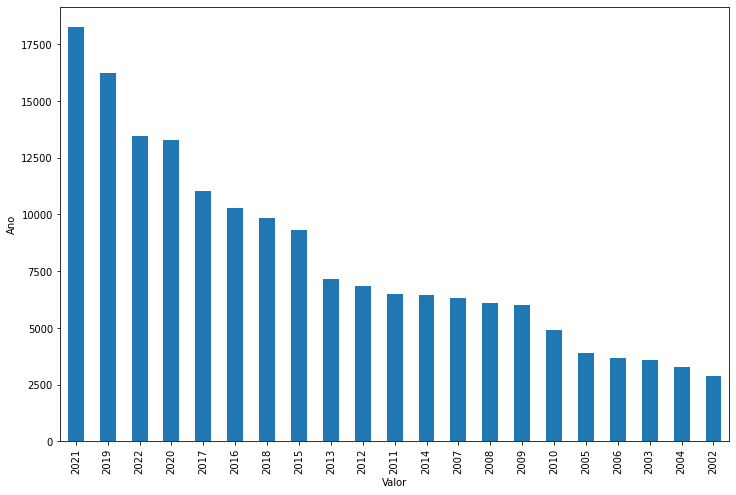

In [65]:
# Gráfico mostrando aumento de gastos dos deputados com o passar dos anos

plotagem.groupby(['Ano'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Valor',ylabel='Ano')

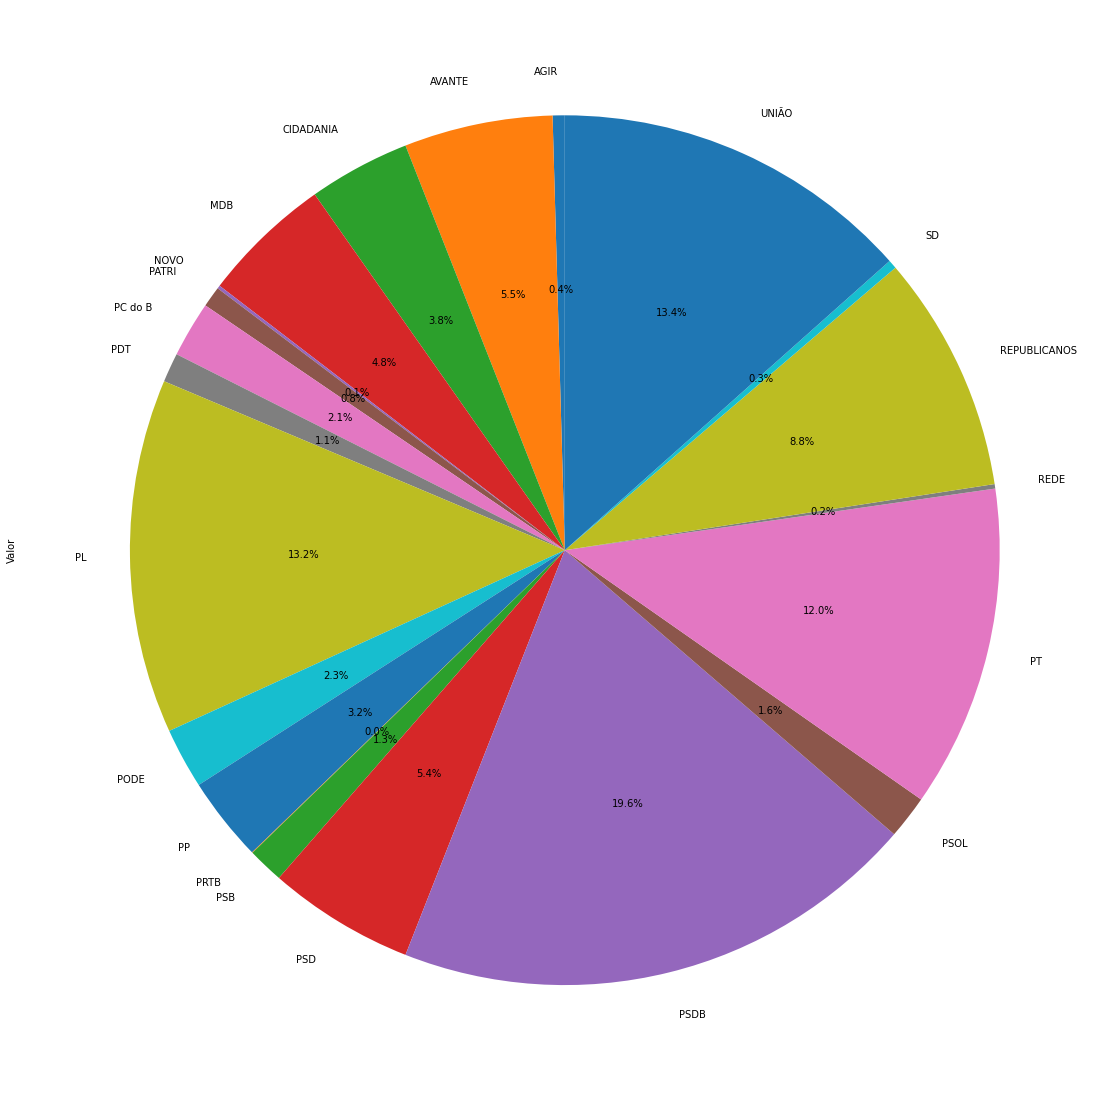

In [66]:
# Gráfico mostrando os partidos e a porcentagem de gasto entre 2002 - 2021

dados.groupby(['Partido']).sum().plot(kind='pie', y='Valor', shadow = False, startangle=90, legend=False, figsize=(30,20), autopct='%1.1f%%')